<a href="https://colab.research.google.com/github/CaroliCosas/Bootcamp_Data_Science/blob/main/Mod2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter

In [2]:
# Cargar datos
def cargar_datos(filepath):
    price = np.genfromtxt(filepath, usecols=(0),delimiter=",", dtype=None, encoding="utf-8", skip_header=1)
    baths = np.genfromtxt(filepath, usecols=(1),delimiter=",", dtype=None, encoding="utf-8", skip_header=1)
    rooms = np.genfromtxt(filepath, usecols=(2),delimiter=",", dtype=None, encoding="utf-8", skip_header=1)
    m2 = np.genfromtxt(filepath, usecols=(3), delimiter=",", dtype=None, encoding="utf-8", skip_header=1)
    addresses = np.genfromtxt(filepath, usecols=(4), delimiter=",", dtype=None, encoding="utf-8", skip_header=1)

    return price, baths, rooms, m2, addresses


In [3]:
# Estadística básica
def estadistica_basica(price):
    mean_price = np.mean(price)
    median_price = np.median(price)
    max_price = np.max(price)
    min_price = np.min(price)
    print(f"Media: {mean_price}, Mediana: {median_price}, Máximo: {max_price}, Mínimo: {min_price}")

In [4]:
# Histograma y curva de densidad
def histograma_curva_densidad(price):
    plt.figure(figsize=(10, 6))
    sns.histplot(price, kde=True, bins=30, color="blue", alpha=0.6)
    plt.title("Histograma y Curva de Densidad de Precios")
    plt.xlabel("Precio (€)")
    plt.ylabel("Frecuencia")
    plt.grid()
    plt.show()

In [5]:
# Cuartiles e IQR
def cuartiles_iqr(price):
    q1 = np.percentile(price, 25)
    q2 = np.percentile(price, 50)
    q3 = np.percentile(price, 75)
    iqr = q3 - q1
    print(f"Q1: {q1}, Q2: {q2}, Q3: {q3}, IQR: {iqr}")
    return q1, q3, iqr

In [6]:
# Filtrar por porcentaje
def filtrar_por_porcentaje(price):
    price_sorted = np.sort(price)
    top_20_percent = price_sorted[int(len(price) * 0.8):]
    bottom_20_percent = price_sorted[:int(len(price) * 0.2)]
    print(f"Top 20% más caro: {len(top_20_percent)}, Bottom 20% más barato: {len(bottom_20_percent)}")
    return top_20_percent, bottom_20_percent

In [7]:
# Moda
def moda(addresses):
    address_mode = Counter(addresses).most_common(1)
    print(f"Moda de las direcciones: {address_mode}")

In [8]:
# Varianza y desviación estándar
def varianza_desviacion(price):
    variance = np.var(price)
    std_dev = np.std(price)
    print(f"Varianza: {variance}, Desviación estándar: {std_dev}")
    return variance, std_dev

In [9]:
# Detectar outliers con Tukey
def filtro_outliers_tukey(price, q1, q3, iqr):
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    outliers = price[(price > upper_limit) | (price < lower_limit)]
    print(f"Outliers detectados: {len(outliers)}")
    return upper_limit, lower_limit, outliers

In [10]:
# Graficar outliers
def graficar_outliers(price, upper_limit, lower_limit):
    plt.figure(figsize=(10, 6))
    sns.histplot(price, bins=30, color="blue", alpha=0.6, kde=True)
    plt.axvline(upper_limit, color='red', linestyle='dashed', linewidth=1, label="Límite Superior")
    plt.axvline(lower_limit, color='blue', linestyle='dashed', linewidth=1, label="Límite Inferior")
    plt.legend()
    plt.title("Outliers con límites marcados")
    plt.grid()
    plt.show()

In [11]:
# Matriz de correlación
def matriz_correlacion(price, bedrooms, bathrooms, m2):
    data_matrix = np.corrcoef([price, bedrooms, bathrooms, m2])
    sns.heatmap(data_matrix, annot=True, xticklabels=["price", "bedrooms", "bathrooms", "m2"], yticklabels=["price", "bedrooms", "bathrooms", "m2"])
    plt.title("Matriz de Correlación")
    plt.show()

In [12]:
# Estandarizar
def estandarizar(price):
    mean_price = np.mean(price)
    std_dev_price = np.std(price)
    price_std = (price - mean_price) / std_dev_price
    return price_std

In [13]:
# Asimetría y curtosis
def asimetria_curtosis(price):
    skewness = stats.skew(price)
    kurtosis = stats.kurtosis(price)
    print(f"Asimetría: {skewness}, Curtosis: {kurtosis}")

In [14]:
# Transformar distribuciones
def transformar_distribuciones(price):
    price_log = np.log(price[price > 0])
    plt.figure(figsize=(10, 6))
    sns.histplot(price_log, kde=True, bins=30, color="green", alpha=0.6)
    plt.title("Transformación Logarítmica de Precios")
    plt.xlabel("Log(Precio)")
    plt.ylabel("Frecuencia")
    plt.grid()
    plt.show()

In [15]:
# Contraste de hipótesis
def contraste_hipotesis_barrio(price, addresses, barrio_x, barrio_y):
    barrio_x_prices = price[addresses == barrio_x]
    barrio_y_prices = price[addresses == barrio_y]
    t_stat, p_value = stats.ttest_ind(barrio_x_prices, barrio_y_prices, equal_var=False)
    print(f"T-stat: {t_stat}, P-value: {p_value}")

def contraste_hipotesis_baños(price, bathrooms):
    three_bathrooms = price[bathrooms >= 3]
    one_two_bathrooms = price[(bathrooms == 1) | (bathrooms == 2)]
    t_stat, p_value = stats.ttest_ind(three_bathrooms, one_two_bathrooms, equal_var=False)
    print(f"T-stat: {t_stat}, P-value: {p_value}")

Primeros 10 Precios: [1920000 1995000 1300000 1650000 1590750 1590000 5700000 2190000 1190000
  675000]
Primeros 10 número de Baños: [3 3 3 3 3 4 5 4 2 2]
Primeros 10 número de Habitaciones: [3 3 4 3 3 5 4 4 2 3]
Primeros 10 Metros cuadrados: [183 170 270 248 116 360 305 183 112 153]
Primeros 10 Barrios: ['Recoletos' 'Castellana' 'Hortaleza' 'Chamartín' 'Recoletos'
 'Cuatro Caminos' 'Recoletos' 'Goya' 'Goya' 'Aravaca']

Media: 1290575.262295082, Mediana: 990000.0, Máximo: 8900000, Mínimo: 122000


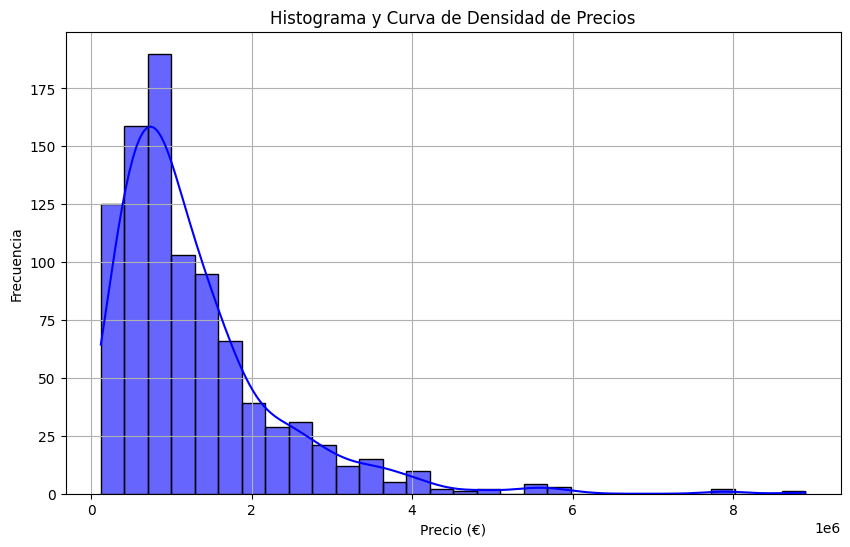

Q1: 625000.0, Q2: 990000.0, Q3: 1650000.0, IQR: 1025000.0
Top 20% más caro: 183, Bottom 20% más barato: 183
Moda de las direcciones: [(np.str_('Barrio de Salamanca'), 63)]
Varianza: 1073448095137.2623, Desviación estándar: 1036073.4023886833
Outliers detectados: 55


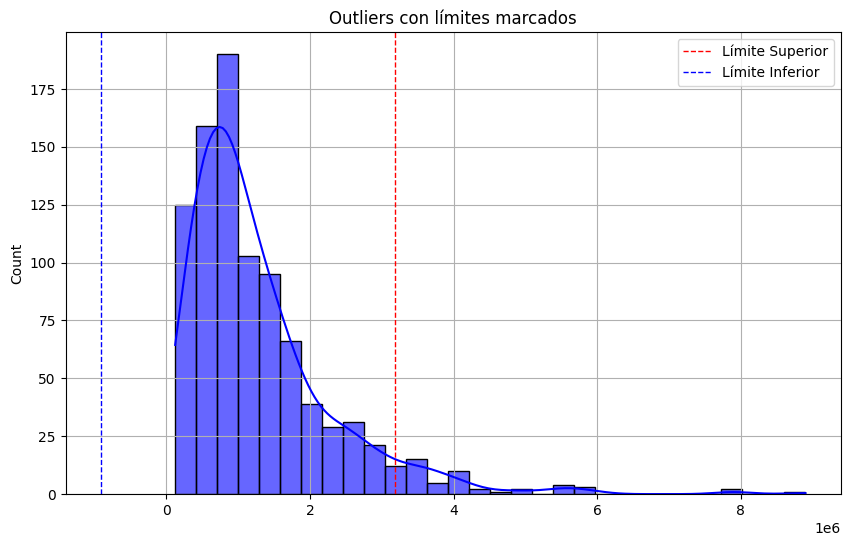

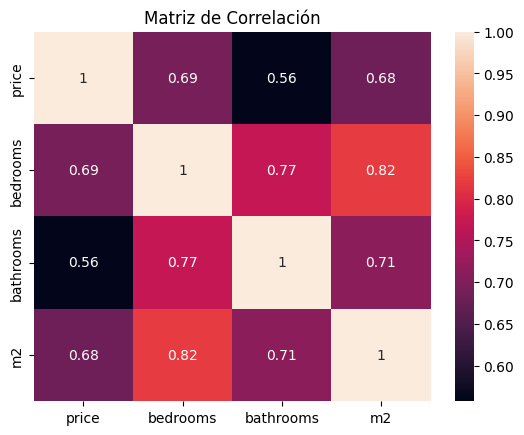

Asimetría: 2.299673447902698, Curtosis: 8.547211919938682


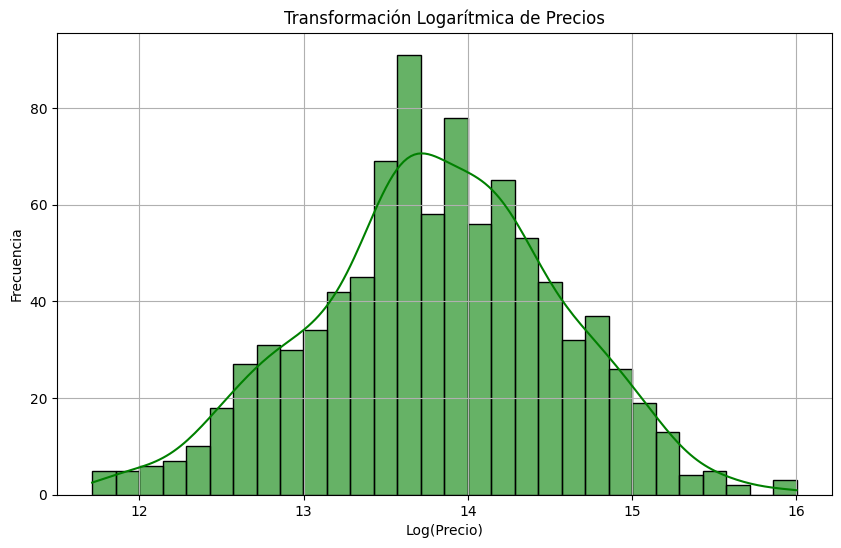

In [20]:
# Carga del archivo y ejecución de análisis
filepath = "../Data/idealista_madrid.csv" 
price, baths, rooms, m2, addresses = cargar_datos(filepath)
# Verificar los datos cargados
print("Primeros 10 Precios:", price[:10])  # Primeros 10 precios
print("Primeros 10 número de Baños:", baths[:10])    # Primeros 10 valores de baños
print("Primeros 10 número de Habitaciones:", rooms[:10])  # Primeros 10 valores de habitaciones
print("Primeros 10 Metros cuadrados:", m2[:10])  # Primeros 10 valores de tamaño
print("Primeros 10 Barrios:", addresses[:10])  # Primeros 10 valores de direcciones
print("")
estadistica_basica(price)
histograma_curva_densidad(price)
q1, q3, iqr = cuartiles_iqr(price)
filtrar_por_porcentaje(price)
moda(addresses)
variance, std_dev = varianza_desviacion(price)
upper_limit, lower_limit, outliers = filtro_outliers_tukey(price, q1, q3, iqr)
graficar_outliers(price, upper_limit, lower_limit)
matriz_correlacion(price, baths, rooms, m2)
price_std = estandarizar(price)
asimetria_curtosis(price)
transformar_distribuciones(price)